## Visualizando con Pandas y Matplotlib

http://pandas.pydata.org/pandas-docs/stable/visualization.html
    

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns

pd.__version__


'0.23.4'

In [3]:
%matplotlib inline
sales = pd.read_csv("https://pbpython.com/extras/sample-salesv2.csv",parse_dates=['date'])
sales.head()

,account number,name,sku,category,quantity,unit price,ext price,date
0,296809,Carroll PLC,QN-82852,Belt,13,44.48,578.24,2014-09-27 07:13:03
1,98022,Heidenreich-Bosco,MJ-21460,Shoes,19,53.62,1018.78,2014-07-29 02:10:44
2,563905,"Kerluke, Reilly and Bechtelar",AS-93055,Shirt,12,24.16,289.92,2014-03-01 10:51:24
3,93356,Waters-Walker,AS-93055,Shirt,5,82.68,413.40,2013-11-17 20:41:11
4,659366,Waelchi-Fahey,AS-93055,Shirt,18,99.64,1793.52,2014-01-03 08:14:27


In [4]:
sales.describe()

,account number,quantity,unit price,ext price
count,1000.000000,1000.000000,1000.000000,1000.00000
mean,535208.897000,10.328000,56.179630,579.84390
std,277589.746014,5.687597,25.331939,435.30381
min,93356.000000,1.000000,10.060000,10.38000
25%,299771.000000,5.750000,35.995000,232.60500
50%,563905.000000,10.000000,56.765000,471.72000
75%,750461.000000,15.000000,76.802500,878.13750
max,995267.000000,20.000000,99.970000,1994.80000


Lo que podemos ver en la descripción:
- Tenemos 1000 registros. 
- Los agregados sobre account_number no significan nada.
- quantity: Tenemos un promedio de 10.32 items por transaccion y stdev de 5.68
- El costo promedio de cada transaccion es de 579.84

Para ver columnas individuales:

In [5]:
sales['unit price'].describe()

count    1000.000000
mean       56.179630
std        25.331939
min        10.060000
25%        35.995000
50%        56.765000
75%        76.802500
max        99.970000
Name: unit price, dtype: float64

Para ver los tipos de datos de cada columna, usamos dtypes.


In [5]:
sales.dtypes

account number             int64
name                      object
sku                       object
category                  object
quantity                   int64
unit price               float64
ext price                float64
date              datetime64[ns]
dtype: object

# Graficando datos



Crear un histograma de una variable

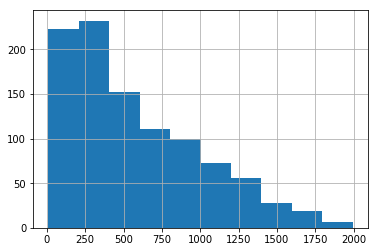

In [6]:
#sns.set(style="dark")

sales['ext price'].hist(bins=10)


Sumarizar el dataset, eliminar algunas columnas para facilitar el análisis. 


In [7]:
customers = sales[['name','ext price','date']]
customers.head()

,name,ext price,date
0,Carroll PLC,578.24,2014-09-27 07:13:03
1,Heidenreich-Bosco,1018.78,2014-07-29 02:10:44
2,"Kerluke, Reilly and Bechtelar",289.92,2014-03-01 10:51:24
3,Waters-Walker,413.40,2013-11-17 20:41:11
4,Waelchi-Fahey,1793.52,2014-01-03 08:14:27


Para ver la distribucion de compras por cliente.

In [8]:
customer_group = customers.groupby('name')
# customer_group.describe() 
#customer_group.mean()
customer_group.size()

name
Berge LLC                        52
Carroll PLC                      57
Cole-Eichmann                    51
Davis, Kshlerin and Reilly       41
Ernser, Cruickshank and Lind     47
Gorczany-Hahn                    42
Hamill-Hackett                   44
Hegmann and Sons                 58
Heidenreich-Bosco                40
Huel-Haag                        43
Kerluke, Reilly and Bechtelar    52
Kihn, McClure and Denesik        58
Kilback-Gerlach                  45
Koelpin PLC                      53
Kunze Inc                        54
Kuphal, Zieme and Kub            52
Senger, Upton and Breitenberg    59
Volkman, Goyette and Lemke       48
Waelchi-Fahey                    54
Waters-Walker                    50
dtype: int64

Ahora, determinar cuanto compró cada cliente, utilizando la función sum y sort para mostrar los mayores compradores.


In [9]:
sales_totals = customer_group.sum()
sales_totals

,ext price
name,
Berge LLC,30064.87
Carroll PLC,35934.31
Cole-Eichmann,30435.42
"Davis, Kshlerin and Reilly",19054.76
"Ernser, Cruickshank and Lind",28089.02
Gorczany-Hahn,22207.90
Hamill-Hackett,23433.78
Hegmann and Sons,35213.72
Heidenreich-Bosco,25428.29


Ya que tenemos un dataframe resumido, producir una gráfica es muy simple.

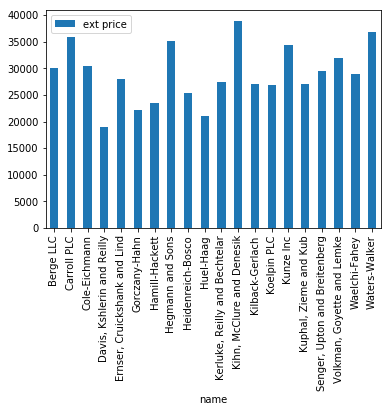

In [10]:
my_plot = sales_totals.plot(kind='bar')

Sin embargo, esta grafica es limitada. Vamos a intentar las siguientes mejoras:
    - ordenar de forma descendiente
    - eliminar la leyenda del eje x
    - agregar un titulo
    - agregar titulos de los ejes

Text(0,0.5,'Sales ($)')

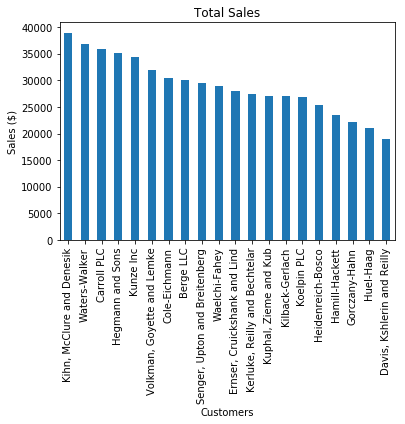

In [11]:
my_plot = sales_totals.sort_values(by='ext price',ascending=False).plot(kind='bar',legend=None,title='Total Sales')
my_plot.set_xlabel("Customers")
my_plot.set_ylabel("Sales ($)")

Resumen general de las categorias, usamos pie, pero podemos simplemente cambiar a "bar"

array([<matplotlib.axes._subplots.AxesSubplot object at 0x11ce45780>],
      dtype=object)

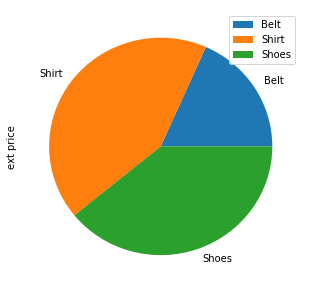

In [12]:
cat_summary = sales[['name','category','ext price']].groupby('category').sum()
cat_summary
cat_summary.plot(kind="pie",subplots=True,figsize=(5,5))

Ahora nos interesa poder hacer algunas graficas para entender el comportamiento de las categorias


In [13]:
customers = sales[['name','category','ext price','date']]
customers.head()

,name,category,ext price,date
0,Carroll PLC,Belt,578.24,2014-09-27 07:13:03
1,Heidenreich-Bosco,Shoes,1018.78,2014-07-29 02:10:44
2,"Kerluke, Reilly and Bechtelar",Shirt,289.92,2014-03-01 10:51:24
3,Waters-Walker,Shirt,413.40,2013-11-17 20:41:11
4,Waelchi-Fahey,Shirt,1793.52,2014-01-03 08:14:27


Obtener el histograma de una sola categoria.


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a1f981ba8>]],
      dtype=object)

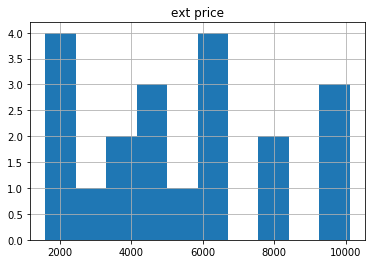

In [14]:
cat_group = customers.groupby(['category','name']).sum()
#cat_group
cat_group.reset_index(inplace=True)
#cat_group

belts = cat_group[cat_group['category'] == "Belt"]
#belts
belts.hist(bins=10)

In [15]:
category_group = customers.groupby(['name','category']).sum()
category_group

ext price
name                          category           
Berge LLC                     Belt        6033.53
                              Shirt       9670.24
                              Shoes      14361.10
Carroll PLC                   Belt        9359.26
                              Shirt      13717.61
                              Shoes      12857.44
Cole-Eichmann                 Belt        8112.70
                              Shirt      14528.01
                              Shoes       7794.71
Davis, Kshlerin and Reilly    Belt        1604.13
                              Shirt       7533.03
                              Shoes       9917.60
Ernser, Cruickshank and Lind  Belt        5894.38
                              Shirt      16944.19
                              Shoes       5250.45
Gorczany-Hahn                 Belt        3642.48
                              Shirt      12576.83
                              Shoes       5988.59
Hamill-Hackett                Belt        1609.74
                              Shirt       8880.04
                              Shoes      12944.00
Hegmann and Sons              Belt        4909.38
                              Shirt      16774.47
                              Shoes      13529.87
Heidenreich-Bosco             Belt        6262.94
                              Shirt       5965.25
                              Shoes      13200.10
Huel-Haag                     Belt        2219.51
                              Shirt      11944.01
                              Shoes       6924.36
Kerluke, Reilly and Bechtelar Belt        4102.11
                              Shirt      12958.23
                              Shoes      10329.09
Kihn, McClure and Denesik     Belt       10116.90
                              Shirt      18956.35
                              Shoes       9862.04
Kilback-Gerlach               Belt        2863.40
                              Shirt       9904.85
                              Shoes      14218.95
Koelpin PLC                   Belt        5327.96
                              Shirt       7908.28
                              Shoes      13575.42
Kunze Inc                     Belt        4264.59
                              Shirt      15638.87
                              Shoes      14503.08
Kuphal, Zieme and Kub         Belt        2009.69
                              Shirt      12101.14
                              Shoes      12921.03
Senger, Upton and Breitenberg Belt        9509.88
                              Shirt       7659.70
                              Shoes      12407.88
Volkman, Goyette and Lemke    Belt        4429.01
                              Shirt      12791.27
                              Shoes      14786.59
Waelchi-Fahey                 Belt        8285.72
                              Shirt      11689.05
                              Shoes       8993.91
Waters-Walker                 Belt        5957.24
                              Shirt      18633.71
                              Shoes      12188.01

Ahora, es necesario "desapilar" con "unstack" para poder crear una grafica "apilada".


In [16]:
category_group.unstack().head()

ext price                    
category                          Belt     Shirt     Shoes
name                                                      
Berge LLC                      6033.53   9670.24  14361.10
Carroll PLC                    9359.26  13717.61  12857.44
Cole-Eichmann                  8112.70  14528.01   7794.71
Davis, Kshlerin and Reilly     1604.13   7533.03   9917.60
Ernser, Cruickshank and Lind   5894.38  16944.19   5250.45

Vamos a personalizar labels, leyendas y ubicacion de la leyenda.

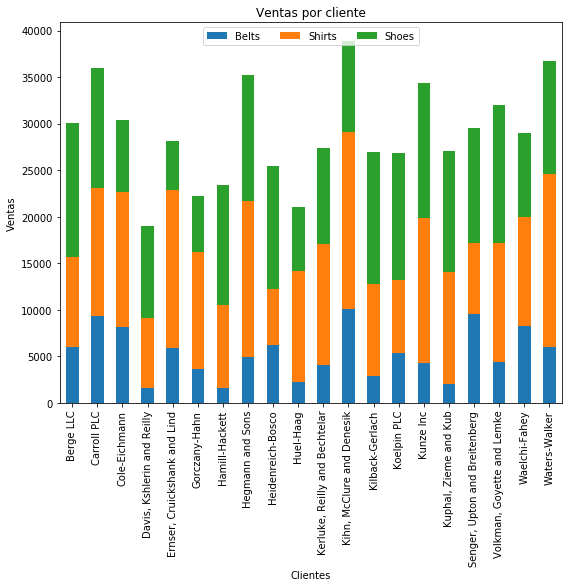

In [17]:
my_plot = category_group.unstack().plot(kind='bar',stacked=True,title='Ventas por cliente',figsize=(9, 7))
my_plot.set_xlabel("Clientes")
my_plot.set_ylabel("Ventas")
my_plot.legend(["Belts","Shirts","Shoes"], loc=9,ncol=4)


Vamos a generar una agrupacion por fecha para analizar evolucion de las ventas en el tiempo, veremos la forma de hacerlo por categoria tambien.

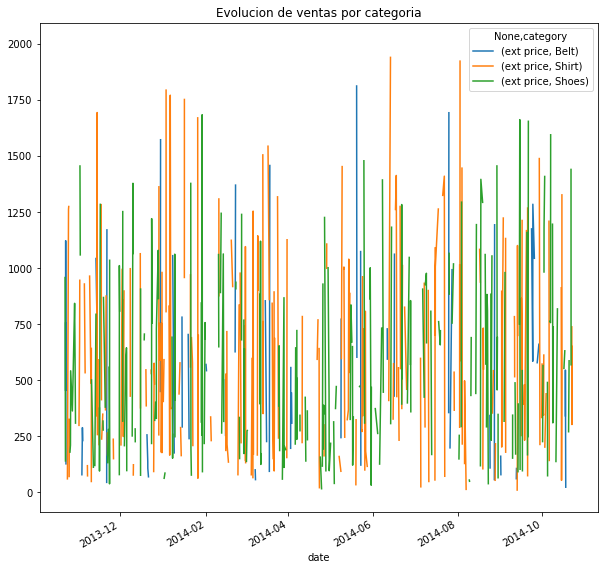

In [18]:
date_group = customers.groupby(['date','category']).sum()
date_group.reset_index()
date_group.unstack().plot(title='Evolucion de ventas por categoria',figsize=(10, 10))
#date_group.unstack().plot(subplots=True,title='Evolucion de ventas por categoria',figsize=(10, 10))
#date_group.unstack().hist(figsize=(10,10))

Ahora, si queremos hacer una visualizacion de porcentajes, es decir, comparar las proporciones de venta de cada cliente, es necesario crear un nuevo dataframe agrupando por cliente y calculando la suma.

In [20]:
# Por renglon
customer_total = customers.groupby(['name']).sum()
customer_total.head()

,ext price
name,
Berge LLC,30064.87
Carroll PLC,35934.31
Cole-Eichmann,30435.42
"Davis, Kshlerin and Reilly",19054.76
"Ernser, Cruickshank and Lind",28089.02


Ahora, vamos a generar el la suma agregada por cliente y categoria, luego, vamos a dividir el resultante por el total del cliente, calculado en el dataframe customer_total y uniendo con level por nombre del cliente (level='name')

In [21]:

customer_pct = customers.groupby(['name','category']).sum().div(customer_total,level='name')
customer_pct.head()

ext price
name        category           
Berge LLC   Belt       0.200684
            Shirt      0.321646
            Shoes      0.477670
Carroll PLC Belt       0.260455
            Shirt      0.381741

Finalmente, vamos a generar el gráfico, primero invocamos unstack para convertir los índices de renglón en índices de columna. Luego graficamos, es necesario ajustar el límite con set_ylim.

(0, 1.0)

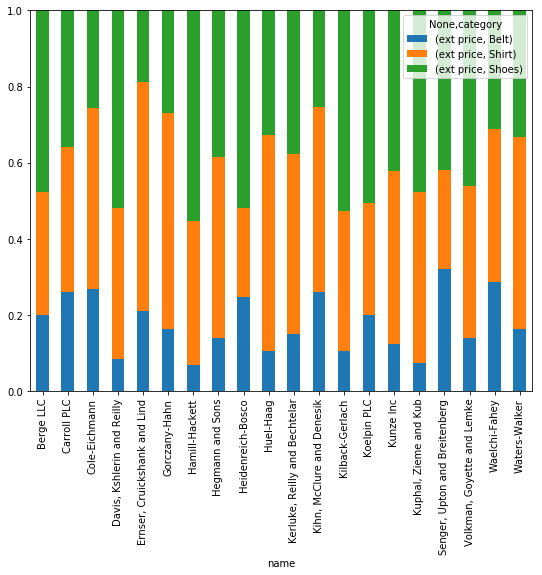

In [22]:
my_plot = customer_pct.unstack().plot(kind='bar',stacked=True, figsize=(9, 7))
my_plot.set_ylim(0,1.0)

In [23]:
# Por columna
cc = customers.groupby(['name','category']).sum().unstack()
cc['Total'] = cc['ext price']['Belt'] + cc['ext price']['Shirt'] + cc['ext price']['Shoes']
cc['BeltR'] = cc['ext price']['Belt'] / cc['Total']
cc['ShirtR'] = cc['ext price']['Shirt'] / cc['Total']
cc['ShoeR'] = cc['ext price']['Shoes'] / cc['Total']
cc


ext price                         Total  \
category                           Belt     Shirt     Shoes             
name                                                                    
Berge LLC                       6033.53   9670.24  14361.10  30064.87   
Carroll PLC                     9359.26  13717.61  12857.44  35934.31   
Cole-Eichmann                   8112.70  14528.01   7794.71  30435.42   
Davis, Kshlerin and Reilly      1604.13   7533.03   9917.60  19054.76   
Ernser, Cruickshank and Lind    5894.38  16944.19   5250.45  28089.02   
Gorczany-Hahn                   3642.48  12576.83   5988.59  22207.90   
Hamill-Hackett                  1609.74   8880.04  12944.00  23433.78   
Hegmann and Sons                4909.38  16774.47  13529.87  35213.72   
Heidenreich-Bosco               6262.94   5965.25  13200.10  25428.29   
Huel-Haag                       2219.51  11944.01   6924.36  21087.88   
Kerluke, Reilly and Bechtelar   4102.11  12958.23  10329.09  27389.43   
Kihn, McClure and Denesik      10116.90  18956.35   9862.04  38935.29   
Kilback-Gerlach                 2863.40   9904.85  14218.95  26987.20   
Koelpin PLC                     5327.96   7908.28  13575.42  26811.66   
Kunze Inc                       4264.59  15638.87  14503.08  34406.54   
Kuphal, Zieme and Kub           2009.69  12101.14  12921.03  27031.86   
Senger, Upton and Breitenberg   9509.88   7659.70  12407.88  29577.46   
Volkman, Goyette and Lemke      4429.01  12791.27  14786.59  32006.87   
Waelchi-Fahey                   8285.72  11689.05   8993.91  28968.68   
Waters-Walker                   5957.24  18633.71  12188.01  36778.96   

                                  BeltR    ShirtR     ShoeR  
category                                                     
name                                                         
Berge LLC                      0.200684  0.321646  0.477670  
Carroll PLC                    0.260455  0.381741  0.357804  
Cole-Eichmann                  0.266555  0.477339  0.256107  
Davis, Kshlerin and Reilly     0.084185  0.395336  0.520479  
Ernser, Cruickshank and Lind   0.209846  0.603232  0.186922  
Gorczany-Hahn                  0.164017  0.566322  0.269660  
Hamill-Hackett                 0.068693  0.378942  0.552365  
Hegmann and Sons               0.139417  0.476362  0.384222  
Heidenreich-Bosco              0.246298  0.234591  0.519111  
Huel-Haag                      0.105251  0.566392  0.328357  
Kerluke, Reilly and Bechtelar  0.149770  0.473111  0.377120  
Kihn, McClure and Denesik      0.259839  0.486868  0.253293  
Kilback-Gerlach                0.106102  0.367020  0.526878  
Koelpin PLC                    0.198718  0.294957  0.506325  
Kunze Inc                      0.123947  0.454532  0.421521  
Kuphal, Zieme and Kub          0.074345  0.447662  0.477993  
Senger, Upton and Breitenberg  0.321525  0.258971  0.419505  
Volkman, Goyette and Lemke     0.138377  0.399641  0.461982  
Waelchi-Fahey                  0.286023  0.403506  0.310470  
Waters-Walker                  0.161974  0.506640  0.331385

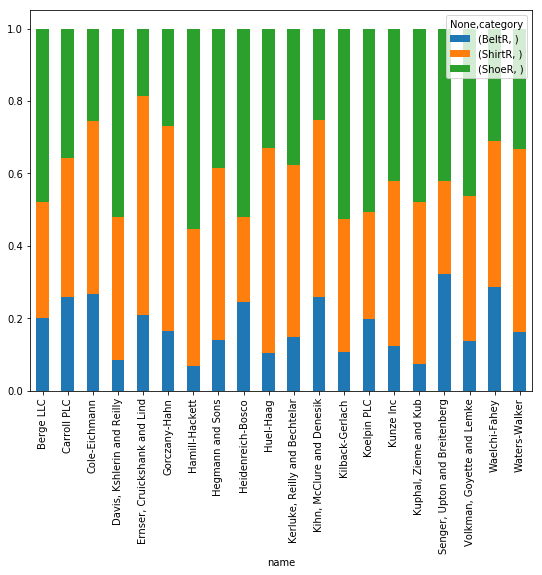

In [24]:
cc[['BeltR','ShirtR','ShoeR']].plot(kind='bar',stacked=True, figsize=(9, 7))

## ¿Qué sigue?

Para mejorar la presentación de los charts de Matplotlib y facilitar algunos procesos, se tiene Seaborn:
    
https://stanford.edu/~mwaskom/software/seaborn/
